<a href="https://colab.research.google.com/github/Macostik/Brotherhood/blob/master/MNIST_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor()
    )

print(training_data)
print(test_data)

train_dataloader = DataLoader(dataset=training_data, batch_size=64)
test_dataloader = DataLoader(dataset=test_data, batch_size=64)

print(train_dataloader)
print(test_dataloader)

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.liner_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
        nn.ReLU()
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.liner_relu_stack(x)
    return logits

model = NeuralNetwork()

print(model)

learing_rate = 0.1
batch_size = 64
epochs = 10

loss_fn = nn.CrossEntropyLoss()
optimazer = torch.optim.SGD(model.parameters(), lr=learing_rate)

def train_loop(dataloader, model, loss_fn, optimazer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    optimazer.zero_grad()
    loss.backward()
    optimazer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)

      print(f"loss: {loss:>7f} [{current:>5d} / {size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= size
  correct /= size

  print(f"Test error: \n Accuracy {100*correct:>0.1f}% Avg loss {test_loss:>8f} \n")


torch.manual_seed(42)

for i in range(epochs):
  print(f"epoch {i+1} \n --------------------------")
  train_loop(dataloader = train_dataloader, model = model, loss_fn = loss_fn, optimazer = optimazer)
  test_loop(dataloader = test_dataloader, model = model, loss_fn = loss_fn)
print("Done!")


100%|██████████| 26421880/26421880 [00:02<00:00, 9984993.59it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 214745.33it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 708275.01it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14589376.35it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (liner_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)
epoch 1 
 --------------------------
loss: 2.311149 [    0 / 60000]
loss: 0.974141 [ 6400 / 60000]
loss: 0.594720 [12800 / 60000]
loss: 0.722392 [19200 / 60000]
loss: 0.613282 [25600 / 60000]
loss: 0.505549 [32000 / 60000]
loss: 0.538848 [38400 / 60000]
loss: 0.595785 [44800 / 60000]
loss: 0.594365 [51200

In [5]:
PATH = "data/mnist_data_model.pth"
torch.save(model.state_dict(), PATH)
saved_model = NeuralNetwork()
saved_model.load_state_dict(torch.load(PATH))
saved_model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (liner_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [6]:
%pip install onnx
%pip install onnxruntime-gpu

import onnxruntime
import torch.onnx as onnx



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.8/200.8 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00


In [7]:
imput_image = torch.zeros((1, 28, 28))
onnx_model = 'data/model.onnx'
onnx.export(saved_model, imput_image, onnx_model)

In [8]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

X, y = test_data[1][0], test_data[1][1]

In [9]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: X.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted; "{predicted}", Actual: "{actual}"')

Predicted; "Pullover", Actual: "Pullover"


In [10]:
# training_datalaoder = DataLoader(training_data, batch_size = batch_size)
# test_dataloader = DataLoader(test_data, batch_size = batch_size)
for X, y in test_dataloader:
  print("Shape of X [N, C, H, W]", X.shape)
  print("Shape of y", y.shape, y.dtype)
  break

Shape of X [N, C, H, W] torch.Size([64, 1, 28, 28])
Shape of y torch.Size([64]) torch.int64


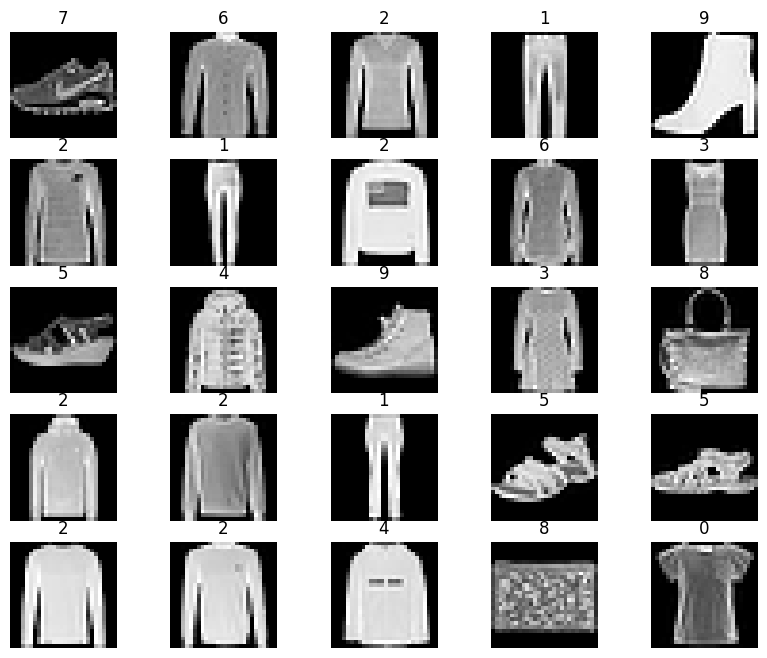

In [12]:
import matplotlib.pyplot as plt

#Display sample data
figure = plt.figure(figsize=(10,8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  idx = torch.randint(len(test_data), size=(1,)).item()
  img, label = test_data[idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()